### Elaborado por:

* Nataly Alvarez Venegas
* Cinthya Arelhi Ochoa Muñoz
* Oscar Eduardo Acero Acero


# Project 2
## Image Classification with CNN
-------------------------------


## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
   * Discuss the results.
   

In [1]:
import cv2
import glob
import numpy as np
import imutils
import piexif
from PIL import Image
from keras.utils import np_utils
import matplotlib.pyplot as plt


Using TensorFlow backend.


#### Se cargan las 600 imágenes del dataset redefiniendo su tamaño a 224x224 para que sea compatible con el modelo VGG16 

In [2]:
def load_images(path_exp, id_class, pixels):
    files = glob.glob (path_exp)
    for myFile in files:
        piexif.remove(myFile)
        img = Image.open(myFile)
        img = img.resize(pixels)
        image = np.array(img)
        X_data.append (image)
        y_data.append(np.array([id_class]))


Se almacenan las imágenes en X_data y se guarda un idenficiador de la respectiva categoria en y_data

In [3]:
X_data = []
y_data = []

In [4]:
load_images("data\\birds\\egret\\*.jpg",0,(224,224))
load_images("data\\birds\\mandarin\\*.jpg",1,(224,224))
load_images("data\\birds\\owl\\*.jpg",2,(224,224))
load_images("data\\birds\puffin\\*.jpg",3,(224,224))
load_images("data\\birds\\toucan\\*.jpg",4,(224,224))
load_images("data\\birds\\wood_duck\\*.jpg",5,(224,224))

In [5]:
x = np.array(X_data)
x.shape

(600, 224, 224, 3)

In [6]:
y= np.array(y_data)
y.shape

(600, 1)

In [7]:
def show_images(images, cols = 2, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontsize=40)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

Ejemplo de los 6 tipos de pájaros presentes en el daset de trabajo

In [8]:
image_sample = (x[0],x[100],x[200],x[300],x[400],x[500])

In [9]:
labels = ['Egret', 'Mandarin','Owl', 'Puffin', 'Toucan', 'Wood_Duck']

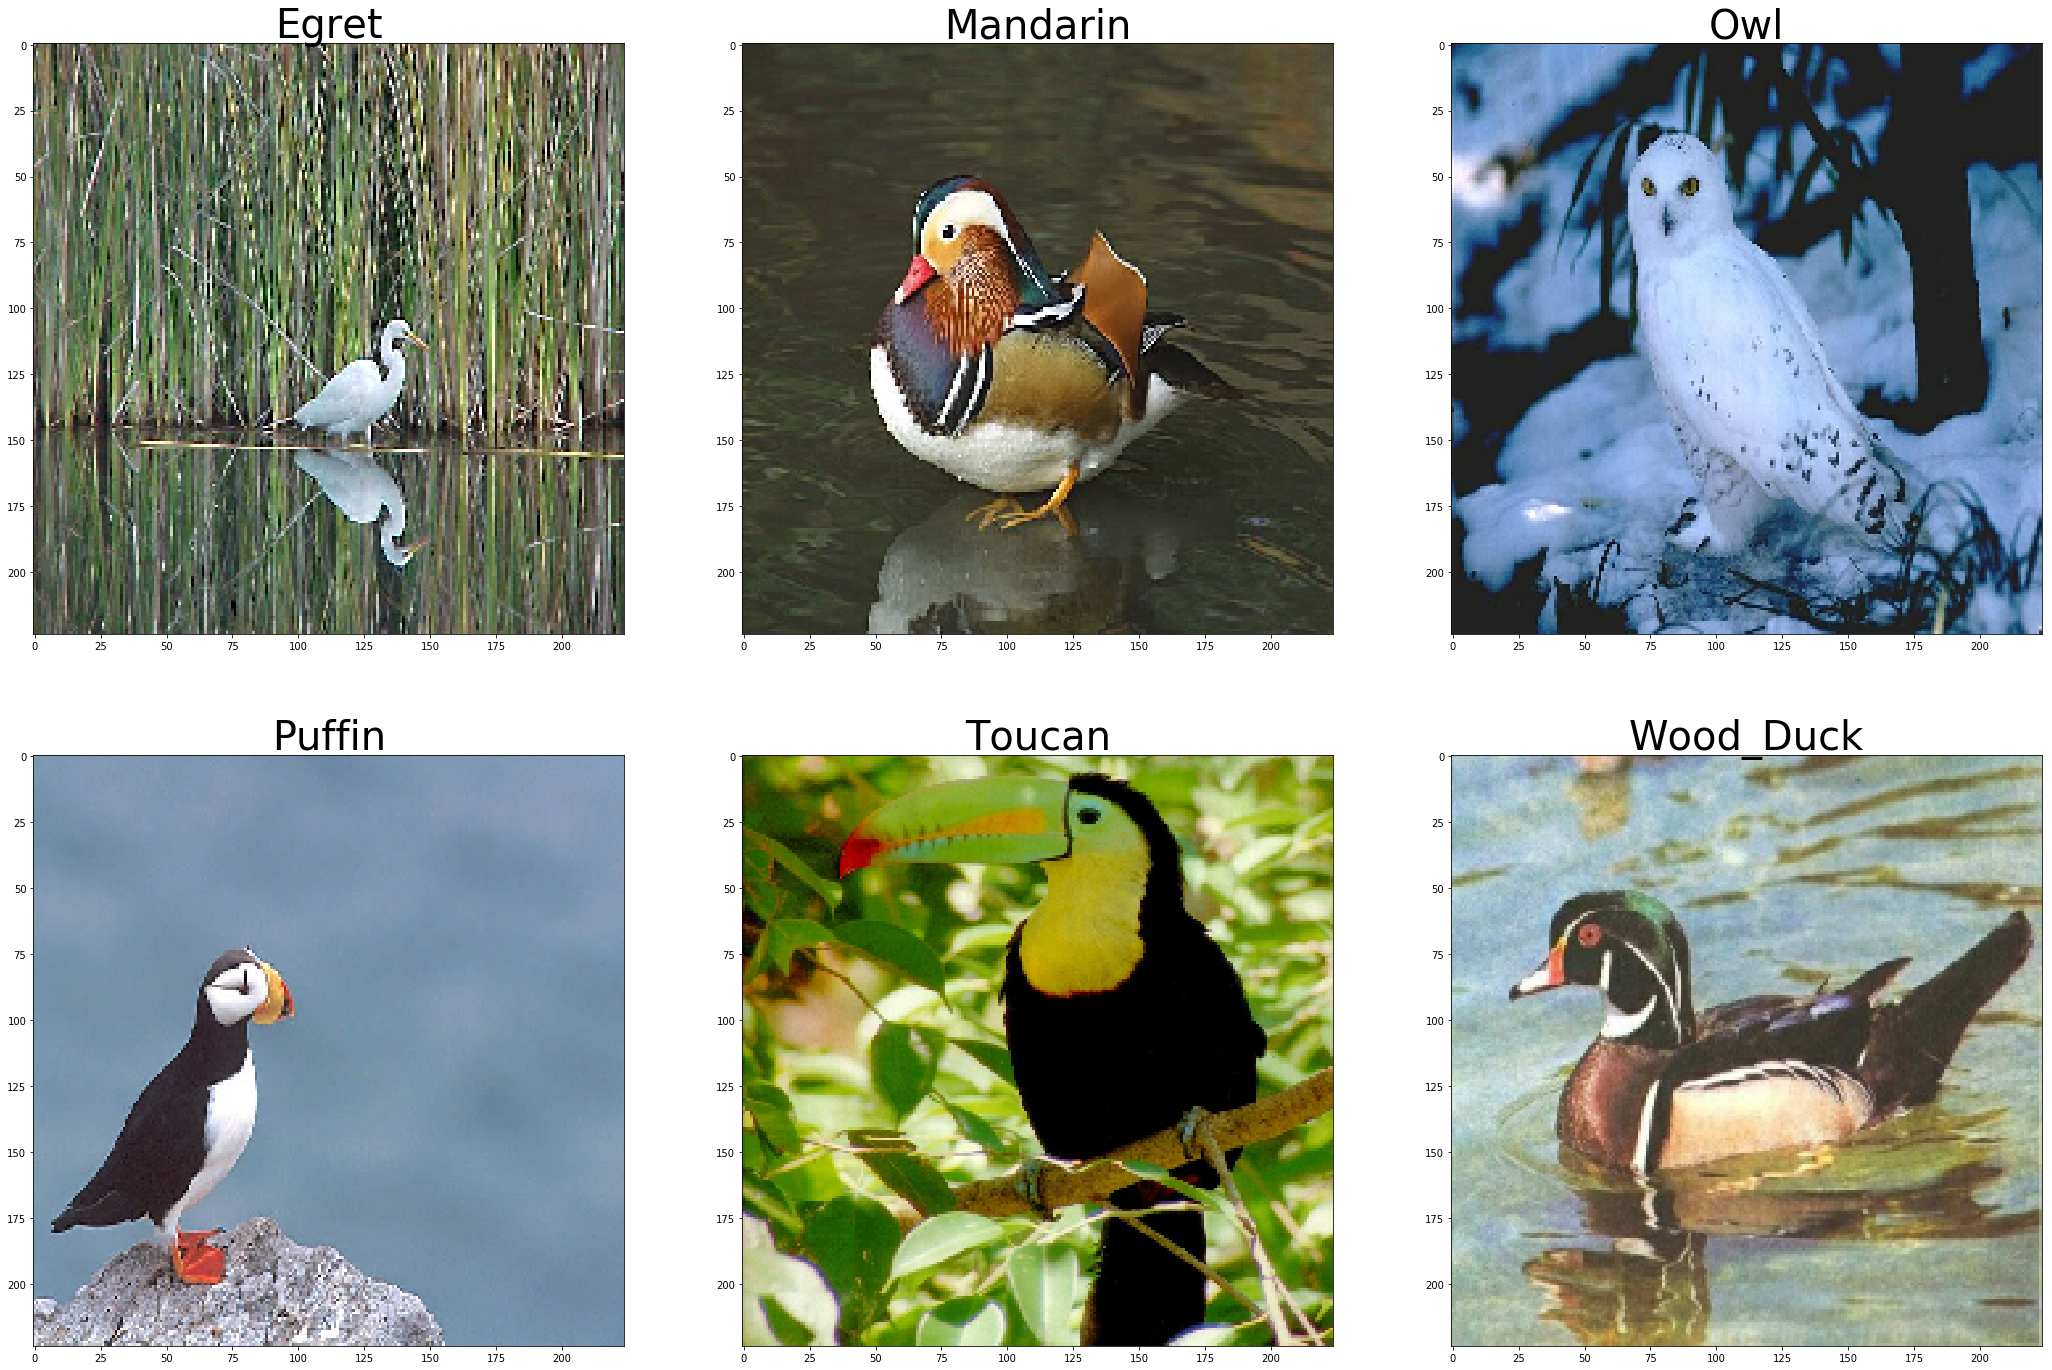

In [10]:
show_images(images=image_sample, titles=labels)

Se convierte a categórica la variable objetivo

In [11]:
nb_classes = 6
Y= np_utils.to_categorical(y, nb_classes)
X = x.astype("float32")
#X/= 255

Carga del modelo VGG16 y clasificación de las 600 imágenes

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16()

predictions = []
id_img = 0
for photo in X:
    id_img += 1
    imagen = photo.reshape((1, photo.shape[0], photo.shape[1], photo.shape[2]))
    # prepare the image for the VGG model
    imagen = preprocess_input(imagen)
    # predict the probability across all output classes
    yhat = model.predict(imagen)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    predictions.append(label[1])
    # print the classification
    print('%s %s (%.2f%%)' % ('Image '+ str(id_img) + ': ', label[1], label[2]*100))

Image 1:  American_egret (79.50%)
Image 2:  American_egret (88.81%)
Image 3:  American_egret (96.81%)
Image 4:  American_egret (84.87%)
Image 5:  American_egret (94.20%)
Image 6:  American_egret (91.64%)
Image 7:  American_egret (98.09%)
Image 8:  American_egret (92.61%)
Image 9:  American_egret (91.51%)
Image 10:  American_egret (86.85%)
Image 11:  American_egret (86.19%)
Image 12:  American_egret (86.99%)
Image 13:  American_egret (70.75%)
Image 14:  American_egret (78.90%)
Image 15:  American_egret (81.09%)
Image 16:  American_egret (98.81%)
Image 17:  American_egret (49.71%)
Image 18:  American_egret (91.21%)
Image 19:  American_egret (92.15%)
Image 20:  American_egret (68.53%)
Image 21:  American_egret (67.12%)
Image 22:  spoonbill (79.84%)
Image 23:  American_egret (93.10%)
Image 24:  American_egret (43.11%)
Image 25:  American_egret (93.10%)
Image 26:  American_egret (66.74%)
Image 27:  American_egret (62.70%)
Image 28:  American_egret (88.39%)
Image 29:  American_egret (99.39%)

Image 265:  hen (84.48%)
Image 266:  ptarmigan (54.22%)
Image 267:  sulphur-crested_cockatoo (70.88%)
Image 268:  hen (54.57%)
Image 269:  ruffed_grouse (44.05%)
Image 270:  kite (77.19%)
Image 271:  prairie_chicken (22.37%)
Image 272:  weasel (28.59%)
Image 273:  ptarmigan (31.42%)
Image 274:  kite (40.51%)
Image 275:  ptarmigan (62.25%)
Image 276:  ptarmigan (96.32%)
Image 277:  kite (98.91%)
Image 278:  ptarmigan (24.31%)
Image 279:  albatross (79.37%)
Image 280:  ruffed_grouse (69.02%)
Image 281:  hen (42.83%)
Image 282:  hen (66.72%)
Image 283:  kite (53.02%)
Image 284:  weasel (28.62%)
Image 285:  hen (30.14%)
Image 286:  ptarmigan (38.15%)
Image 287:  sulphur-crested_cockatoo (66.46%)
Image 288:  hen (60.09%)
Image 289:  ptarmigan (56.33%)
Image 290:  great_grey_owl (29.12%)
Image 291:  kite (31.73%)
Image 292:  cheetah (9.20%)
Image 293:  meerkat (90.53%)
Image 294:  kite (42.07%)
Image 295:  ruffed_grouse (32.18%)
Image 296:  meerkat (74.31%)
Image 297:  ptarmigan (39.92%)
Ima

Image 545:  drake (90.18%)
Image 546:  drake (94.84%)
Image 547:  drake (97.21%)
Image 548:  drake (96.76%)
Image 549:  drake (77.78%)
Image 550:  red-breasted_merganser (61.47%)
Image 551:  drake (32.63%)
Image 552:  quail (44.82%)
Image 553:  drake (99.94%)
Image 554:  drake (97.51%)
Image 555:  drake (98.20%)
Image 556:  drake (94.12%)
Image 557:  drake (99.34%)
Image 558:  drake (98.91%)
Image 559:  drake (98.99%)
Image 560:  drake (93.47%)
Image 561:  drake (97.05%)
Image 562:  drake (95.03%)
Image 563:  drake (93.66%)
Image 564:  drake (93.67%)
Image 565:  drake (98.35%)
Image 566:  drake (99.83%)
Image 567:  brambling (51.49%)
Image 568:  drake (78.87%)
Image 569:  drake (98.04%)
Image 570:  drake (79.83%)
Image 571:  drake (75.70%)
Image 572:  drake (99.75%)
Image 573:  drake (83.75%)
Image 574:  drake (96.93%)
Image 575:  drake (98.17%)
Image 576:  drake (99.18%)
Image 577:  drake (98.57%)
Image 578:  drake (99.80%)
Image 579:  toucan (33.37%)
Image 580:  drake (99.91%)
Image 

Obtenemos el top 10 de las categorías que más veces predijo el modelo

In [13]:
from collections import Counter

predicted_occurrences = Counter(predictions)
top_10 = predicted_occurrences.most_common(10)
top_10

[('drake', 183),
 ('toucan', 114),
 ('American_egret', 89),
 ('ptarmigan', 41),
 ('oystercatcher', 17),
 ('hen', 14),
 ('kite', 12),
 ('albatross', 11),
 ('magpie', 10),
 ('spoonbill', 8)]

In [14]:
top_cat_classes = [('American_egret', 0),
                   ('mandarin', 1),
                   ('owl', 2),
                   ('puffin', 3),
                   ('toucan', 4),
                   ('wood_duck', 5),
                   ('drake', 6),
                   ('ptarmigan', 7),
                   ('oystercatcher', 8),
                   ('hen', 9),
                   ('kite', 10),
                   ('albatross', 11),
                   ('magpie', 12),
                   ('spoonbill', 13),
                   ('others', 14)]

Asociamos las predicciones a los identificadores del top de categorias (las demás categorías las juntamos en 'otros')

In [15]:
predictions_id = []

for i in predictions:
    other = True
    for j in top_cat_classes:
        if i == j[0]:
            predictions_id.append(j[1])
            other = False
            break
    if other:
         predictions_id.append(14)

Y_id = []
for i in y_data:
    Y_id.append(int(i))
    

Matriz de confusión de los resultados obtenidos. Tendremos en cuenta las 6 categorías que se definen en el dataset de trabajo y las 10 categorías que el modelo predijo con mayor frecuencia. Al unirlas obtenemos un total de 14 categorías para nuestra matriz de confusión.


In [16]:
import pandas as pd
df = pd.DataFrame(top_cat_classes, columns=['Categoty', 'Id'])
df

,Categoty,Id
0,American_egret,0
1,mandarin,1
2,owl,2
3,puffin,3
4,toucan,4
5,wood_duck,5
6,drake,6
7,ptarmigan,7
8,oystercatcher,8
9,hen,9


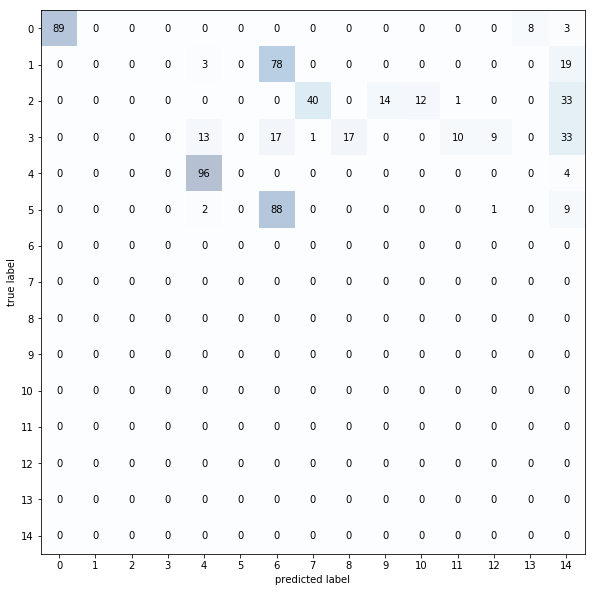

In [17]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_id, predictions_id)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))
id_list = [i[1] for i in top_cat_classes]
plt.xticks(id_list)
plt.yticks(id_list)
plt.show()

#### Se pueden hacer varios análisis a partir de la matriz de confusión:
* El modelo es bastante bueno para clasificar pájaros American Egret (89 de 100) y Toucan (96 de 100) salvo en algunos casos donde no logró clasificar adecuadamente las imágenes.
* El modelo no es capaz de reconocer las categorias Mandarin y Wood Duck, pero la mayoria de las imágenes provenientes de estas categorias son clasificadas como Drake(78 de 100 Mandarin y 88 de 100 Wood Duck ). Esta clasificación no es totalmente errada ya que en realidad Drake es una familia de pájaro que entre otros tipos abarca a Mandarin y Wood Duck. 
* El modelo no reconoce Owl ni Puffin y tampoco realiza una clasificación adecuada de las imágenes de estas categorias a otras categorias que puedan ser significativamente similares.


## 2. Transfer learning
   * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 

División del dataset de imágenes en train y test

In [18]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras
from keras import optimizers
from keras.applications.vgg16 import VGG16

Cargamos el modelo VGG16 sin incluir la última capa

In [20]:
model_vgg16 = VGG16(weights='imagenet', include_top=False)
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

Pasamos las imágenes a través del modelo cargado para obtener la entrada de la nueva red neuronal

In [21]:
X_train2 = model_vgg16.predict(X_train)
X_train2.shape

(480, 7, 7, 512)

In [22]:
X_test2 = model_vgg16.predict(X_test)
X_test2.shape

(120, 7, 7, 512)

Creamos una nueva red neuronal con la arquitectura indicada en el enunciado, cuya entrada tiene las dimensiones de la salida de la penúltima capa del modelo VGG16 original.

In [23]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=X_train2.shape[1:]))
model_2.add(Dense(units=256))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=6))
model_2.add(Activation('softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 6,424,326
Trainable params: 6,424,326
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics = ['accuracy'])

Realizamos entrenamiento y validación del nuevo modelo.

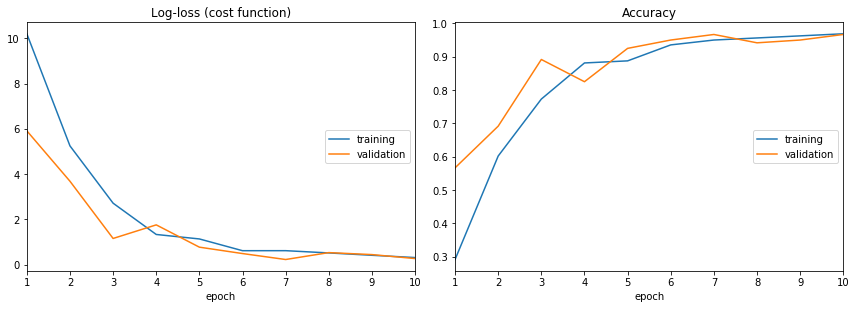

In [26]:
model_2.fit(X_train2, Y_train, validation_data=[X_test2, Y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

Precisión con los datos de test

In [27]:
score = model_2.evaluate(X_test2, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

120/120 [==============================] - 0s 3ms/step
Test score: 0.2673186003793186
Test accuracy: 0.9666666666666667


Elaboración de la matriz de confusión de los resultados

In [28]:
class_pred = model_2.predict_classes(X_test2, batch_size=128)

In [29]:
Y_test2 = np.argmax(Y_test,axis=1) 

0 egret

1 mandarin

2 owl

3 puffin

4 toucan

5 wood_duck

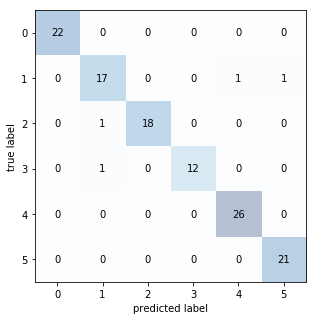

In [30]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_test2, class_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
plt.show()

#### Analizando la matriz de confusíon luego de realizar el proceso de transfer learning
* La precisión de la clasificación mejoró notablemente en comparación con el punto anterior.
* Aquellas imaágenes de categorías de pájaros que el modelo VGG16 no lograba identificar adecuadamente como los Mandarin, Owl, Puffin y Wood Duck; ahora el nuevo modelo es capaz de clasificarlas correctamente en más del 96% de los casos.

#### Sobre el entrenamiento del nuevo modelo
* Partiendo de la penúltima capa del modelo VGG16 y entrenando la nueva red neuronal con las imágenes propias del problema en cuestión se logró mejorar notablemente la precisión de clasificación.
* Se realizaron varias pruebas y se estableció que ajustando el learning rate a 0.0001, se logra una alta precisión del modelo con pocas iteraciones. 

   
## 3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

El proceso de Fine Tuning se realizará de 2 formas:

### Reentrenando todas las capas

In [31]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv_3 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_conv_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Modificamos la propiedad trainable de cada capa a True para recalcular sus pesos durante el entrenamiento del nuevo modelo. 

In [32]:
for layer in vgg_conv_3.layers:
    layer.trainable = True
    
# Check the trainable status of the individual layers
for layer in vgg_conv_3.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x0000021C3D8F7860> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D4B24E0> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D8CA940> True
<keras.layers.pooling.MaxPooling2D object at 0x0000021C3D45FB38> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D3E3898> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D63AB38> True
<keras.layers.pooling.MaxPooling2D object at 0x0000021C3D64C908> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D673748> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D6734E0> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D688DD8> True
<keras.layers.pooling.MaxPooling2D object at 0x0000021C3D6B5C50> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D6D7860> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D6D75F8> True
<keras.layers.convolutional.Conv2D object at 0x0000021C3D704DD8> True
<keras.layers.pool

Definimos una nueva red neuronal que parte del modelo VGG16 y se adiciona la arquitectura proppuesta en el enunciado. 

In [33]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model_5 = models.Sequential()
 
# Add the vgg convolutional base model
model_5.add(vgg_conv_3)
 
# Add new layers
model_5.add(layers.Flatten())
model_5.add(layers.Dense(256, activation='relu'))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 21,139,014
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001),
              metrics=['acc'])

Realizamos entrenamiento y validación del nuevo modelo.

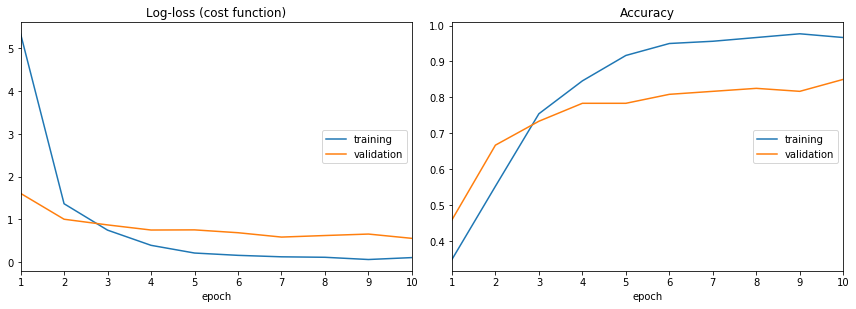

In [35]:
model_5.fit(X_train, Y_train, validation_data=[X_test, Y_test], 
          batch_size=8, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

Precisión con los datos de test

In [36]:
score = model_5.evaluate(X_test, Y_test, batch_size=8)
print('Test score:', score[0])
print('Test accuracy:', score[1])

120/120 [==============================] - 10s 87ms/step
Test score: 0.5557276457548141
Test accuracy: 0.85


Elaboración de la matriz de confusión de los resultados

In [37]:
class_pred5 = model_5.predict_classes(X_test, batch_size=8)

In [38]:
Y_test5 = np.argmax(Y_test,axis=1) 

0 egret

1 mandarin

2 owl

3 puffin

4 toucan

5 wood_duck

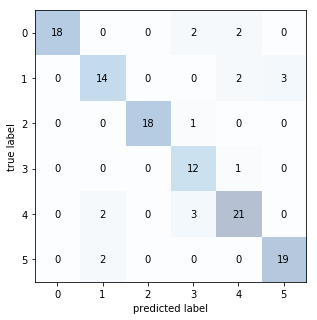

In [39]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm_5 = confusion_matrix(Y_test5, class_pred5)
fig, ax = plot_confusion_matrix(conf_mat=cm_5, figsize=(5,5))
plt.show()

### Reentrenando las último bloque de convoluciones

In [45]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_conv.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [46]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x0000021D66801710> False
<keras.layers.convolutional.Conv2D object at 0x0000021D66801A58> False
<keras.layers.convolutional.Conv2D object at 0x0000021D66801940> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021D668018D0> False
<keras.layers.convolutional.Conv2D object at 0x0000021D49178828> False
<keras.layers.convolutional.Conv2D object at 0x0000021D4D712E10> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021D4921C080> False
<keras.layers.convolutional.Conv2D object at 0x0000021D49230128> False
<keras.layers.convolutional.Conv2D object at 0x0000021D49213630> False
<keras.layers.convolutional.Conv2D object at 0x0000021D491F8630> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021D49200A20> False
<keras.layers.convolutional.Conv2D object at 0x0000021D491EE6A0> False
<keras.layers.convolutional.Conv2D object at 0x0000021D491DBBA8> False
<keras.layers.convolutional.Conv2D object at 0x0000021D491CBE10> False
<ker

In [47]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model_3 = models.Sequential()
 
# Add the vgg convolutional base model
model_3.add(vgg_conv)
 
# Add new layers
model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 13,503,750
Non-trainable params: 7,635,264
_________________________________________________________________


In [48]:
# Compile the model
model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001),
              metrics=['acc'])

Realizamos entrenamiento y validación con nuevo modelo

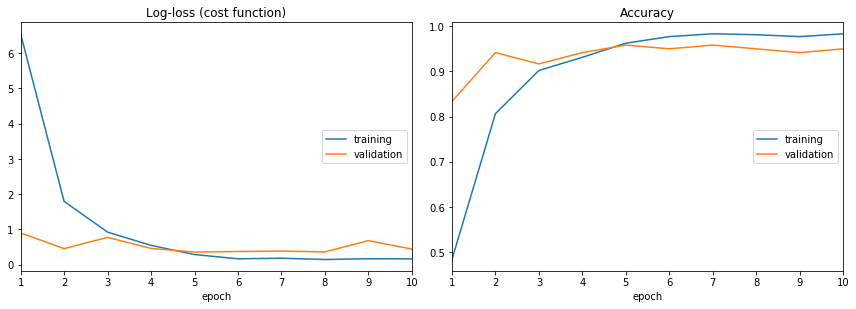

In [50]:
model_3.fit(X_train, Y_train, validation_data=[X_test, Y_test], 
          batch_size=8, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

Precisión con los datos de test

In [52]:
score = model_3.evaluate(X_test, Y_test, batch_size=8)
print('Test score:', score[0])
print('Test accuracy:', score[1])

120/120 [==============================] - 10s 83ms/step
Test score: 0.4383622641458762
Test accuracy: 0.95


Elaboración de la matriz de confusión de los resultados

In [53]:
class_pred3 = model_3.predict_classes(X_test, batch_size=8)

In [54]:
Y_test3 = np.argmax(Y_test,axis=1) 

0 egret

1 mandarin

2 owl

3 puffin

4 toucan

5 wood_duck

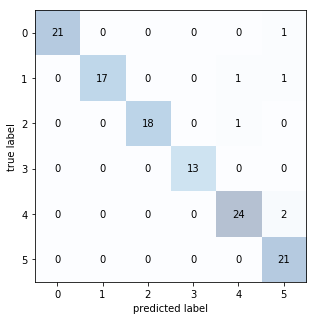

In [55]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm_3 = confusion_matrix(Y_test3, class_pred3)
fig, ax = plot_confusion_matrix(conf_mat=cm_3, figsize=(5,5))
plt.show()

#### Sobre el entrenamiento con Fine Tuning
* Respecto al punto anterior de Transfer Learning, con Fine Tuning el proceso de entrenamiento es notablemente más demorado. Además fue necesario modificar el optimizador RMSprop a SGD y disminuir el learning rate de 0.001 a 0.0001 para lograr que la red neuronal aprendiera.
* También es evidente que el entramiento con Fine Tuning tardó más cuando se entrenaron todas las capas que cuando se entrenó el último bloque de convoluciones. 

#### Sobre los resultados
* Comparando la precisicón de los modelos obtenidos con Fine Tuning vs el modelo obtenido con Transfer Learning, con este último se obtuvieron mejores resultados. Una posible explicación a esta situación es que al entrenar más capas de la red es necesario contar con una mayor cantidad de datos de entrenamiento.
* Comparando los modelos generados mediante Fine Tuning, se obtuvo mejor precisión sobre los datos de prueba con el modelo donde se entrenó solo la última capa de convoluciones (Accuracy 95%)  del VGG16 que el modelo donde se entrenaron todas las capas (Accuracy 85%). Esto se debe a que al modificar los pesos de toda la red neuronal sin contar con un volumen considerable de datos de entrenamiento no se logra al precisión deseable para identificar caracteristicas tanto generales como específicas sobre las imagenes. 
